Task 1: Load the given “airline_data” csv data with python pandas

In [ ]:
# Added the following lines to upload dataset to google colab, allows me to work
# on labs from multiple machines.
from google.colab import files
uploaded = files.upload()

Saving airline_data.csv to airline_data.csv


In [ ]:
!pip install pmdarima
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.9 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('airline_data.csv')

Task 2: Print the shape, head, and tail of the data. [5 points]


In [ ]:
print('Shape of Dataframe:')
print(df.shape)
print('\nHead of Dataframe:')
print(df.head(5))
print('\nTail of Dataframe:')
print(df.tail(5))

Shape of Dataframe:
(144, 2)

Head of Dataframe:
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

Tail of Dataframe:
       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


Task 3: Convert the month column values into datetime object. [5 points]


In [ ]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
print(df['Month'])

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]


Task 4: Visualize the time series data with a x-y plane. X-axis will be the month and Y-axis will be the number of passengers. [5 points]


Text(0, 0.5, 'Number of Passengers')

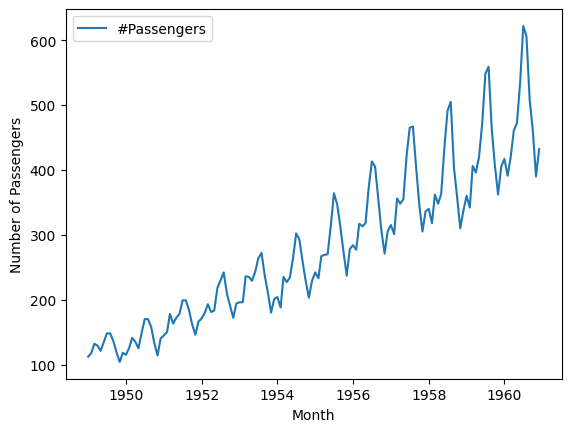

In [ ]:
df.index = df['Month']
del df['Month']
sns.lineplot(df)
plt.ylabel('Number of Passengers')

Task 5: Observe the stationarity in the time series data using the Dickey Fuller test. [10 points]


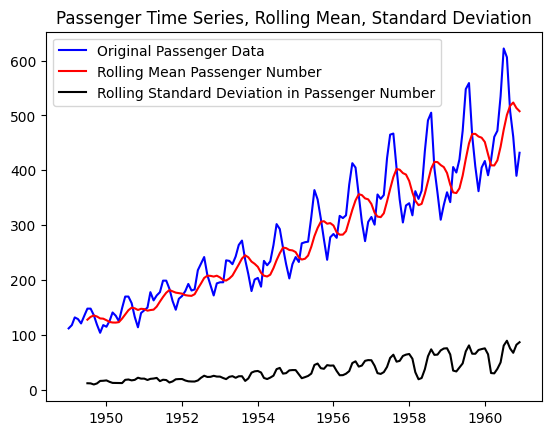

In [ ]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()
plt.plot(df, color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

In [ ]:
adft = adfuller(df,autolag="AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3],
                                    adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]
                        , "Metric":["Test Statistics","p-value","No. of lags used"
                        ,"Number of observations used",
                        "critical value (1%)",
                        "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


Task 6: Next, plot the 6-months rolling mean and standard deviation in the same plot with the original data. Use color as legends to indicate mean, standard deviation, and original data [10 points]


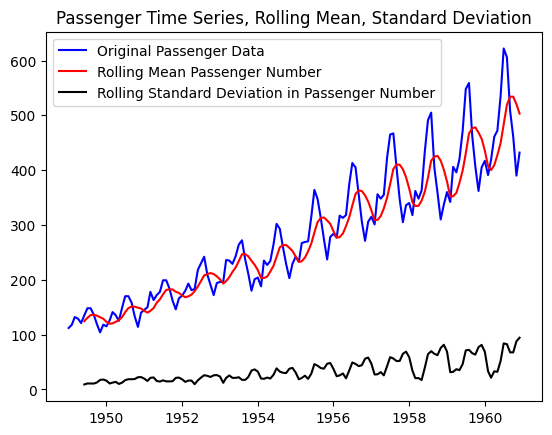

In [ ]:
rolling_mean = df.rolling(6).mean()
rolling_std = df.rolling(6).std()
plt.plot(df, color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

Task 7: Autocorrelation test in the dataset. [5 points]
Note: If our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well. You can use Pandas dataframe autocorrelation method. Autocorrelation can be done based on the 1  month lag, as well as more lags such as 3 months, 6 months, and 9 months.

In [ ]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)
autocorrelation_lag3 = df['#Passengers'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['#Passengers'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['#Passengers'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.9601946480498523
Three Month Lag:  0.837394765081794
Six Month Lag:  0.7839187959206183
Nine Month Lag:  0.8278519011167601


Task 8: Decomposition of Trends tells about the trends in the data. You can use seasonal_decompose from the statsmodels package. [10 points]
Note: This will have a plot with original data, trend line, seasonality (pattern), and residuals.


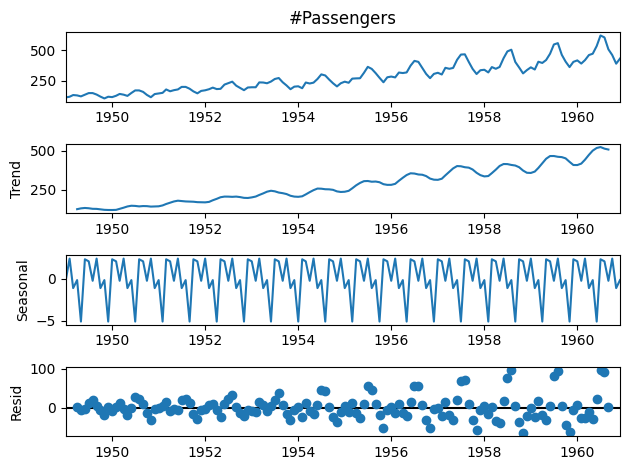

In [ ]:
decompose = seasonal_decompose(df['#Passengers'],model='additive', period=7)
decompose.plot()
plt.show()

Task 9: Splits for Forecasting using ARIMA (AutoRegressive Integrated Moving Average) method. For this, you need to split the data into training and test based on the time/month column. Use <1960-07 for training and >=1960-07 for testing. [10 points]
Note: You can plot the training and test data in a plot with colors to represent the split.


In [ ]:
train = df[df.index < '1960-07']
test = df[df.index >= '1960-07']

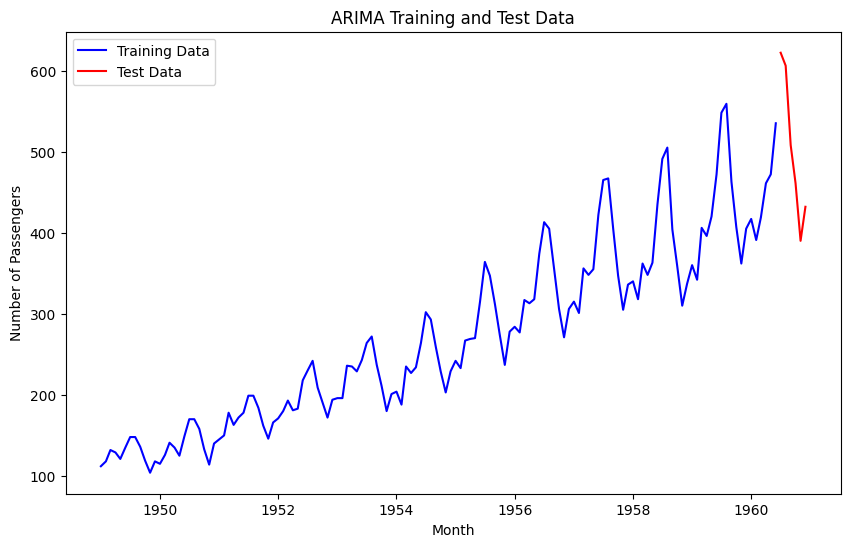

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['#Passengers'], color='blue', label='Training Data')
plt.plot(test.index, test['#Passengers'], color='red', label='Test Data')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('ARIMA Training and Test Data')
plt.legend()
plt.show()

Task 10: Here we do predictions for the testing data. Also present the output of the model, where you can differentiate original test and predicted output using colors. [10 points]

In [ ]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1275.901, Time=3.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1336.888, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1327.364, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1323.618, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1336.209, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1318.147, Time=0.77 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.59 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.21 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1282.061, Time=1.65 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 24.20

Task 11: Calculate and output the root mean squared error (RMSE) for the test and forecasted line. [5 points]

In [ ]:
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  46.78130772097689


Task 12: redo Task 9 to Task 11 for a different train test split with training being <1957-12 and test being >=1958-01.  [20 points]

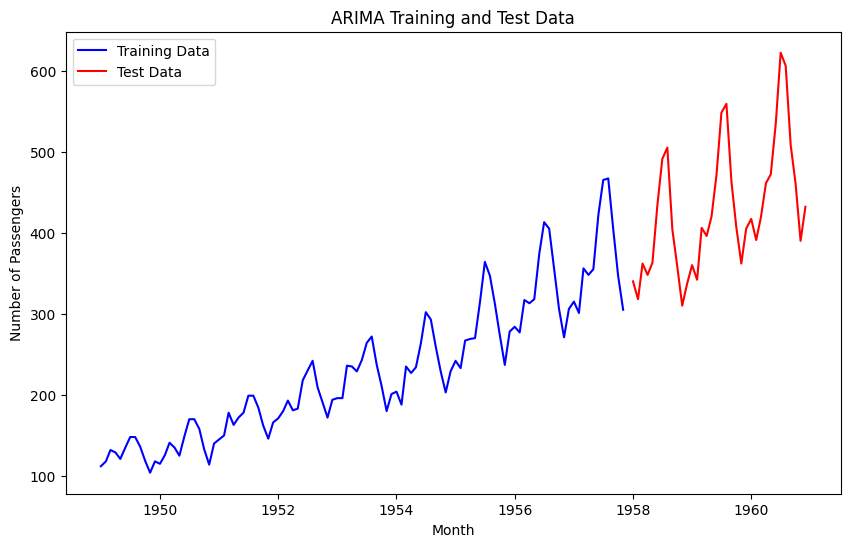

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=993.219, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=985.254, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=980.353, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=991.749, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=977.351, Time=1.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=978.659, Time=0.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=981.927, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=975.714, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=978.602, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=983.490, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=971.363, Time=0.50 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=980.405, Time=0.3

In [ ]:
# Task 9:
train = df[df.index < '1957-12']
test = df[df.index >= '1958-01']
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['#Passengers'], color='blue', label='Training Data')
plt.plot(test.index, test['#Passengers'], color='red', label='Test Data')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('ARIMA Training and Test Data')
plt.legend()
plt.show()
# Task 10
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
# Task 11
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(test)
test = imp.transform(test)
imp.fit(forecast)
forecast = imp.transform(forecast)
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)